# Third Party Libraries With Rich Output

A number of third party libraries defined their own custom display logic. This gives their objcts rich output by default when used in the Notebook.

In [1]:
from IPython.display import display

## Pandas

[Pandas](http://pandas.pydata.org/) is a data analysis library for Python. Its `DataFrame` objects have an HTML table representation in the Notebook.

In [2]:
import pandas

Here is a small amount of stock data for APPL:

In [3]:
%%writefile data.csv
Date,Open,High,Low,Close,Volume,Adj Close
2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53

Overwriting data.csv


Read this as into a `DataFrame`:

In [4]:
df = pandas.read_csv('data.csv')

And view the HTML representation:

In [5]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
1,2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2,2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
3,2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
4,2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
5,2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53


## SymPy

[SymPy](http://sympy.org/) is a symbolic computing library for Python. Its equation objects have LaTeX representations that are rendered in the Notebook.

In [8]:
from sympy.interactive.printing import init_printing
init_printing(use_latex='mathjax')

In [9]:
from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = map(Function, 'fgh')

In [10]:
Rational(3,2)*pi + exp(I*x) / (x**2 + y)

        ⅈ⋅x 
3⋅π    ℯ    
─── + ──────
 2     2    
      x  + y

In [11]:
a = 1/x + (x*sin(x) - 1)/x
a

x⋅sin(x) - 1   1
──────────── + ─
     x         x

In [12]:
(1/cos(x)).series(x, 0, 6)

     2      4        
    x    5⋅x     ⎛ 6⎞
1 + ── + ──── + O⎝x ⎠
    2     24         

## Altair

[Vincent](https://vincent.readthedocs.org/en/latest/) is a visualization library that uses the [Vega](http://trifacta.github.io/vega/) visualization grammar to build [d3.js](http://d3js.org/) based visualizations in the Notebook and on http://nbviewer.jupyter.org. `Visualization` objects in Vincetn have rich HTML and JavaSrcript representations.

In [16]:
from altair import Chart, Scale, Axis, Color, X, Y

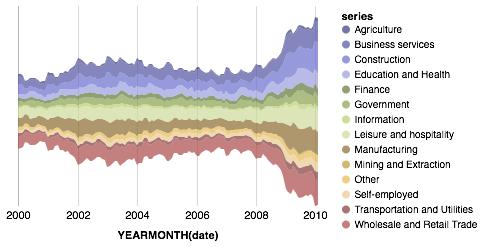

In [19]:
Chart('https://vega.github.io/vega-lite/data/unemployment-across-industries.json').mark_area(
    stacked='center',
).encode(
    color=Color('series:N',
        scale=Scale(
            range='category20b',
        ),
    ),
    x=X('date:T',
        axis=Axis(
            axisWidth=0.0,
            format='%Y',
            labelAngle=0.0,
            tickSize=0.0,
        ),
        scale=Scale(
            nice='month',
        ),
        timeUnit='yearmonth',
    ),
    y=Y('sum(count):Q',
        axis=False,
    ),
).configure_cell(
    height=200.0,
    width=300.0,
)